In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [11]:
ndata = pd.read_csv("NextData.csv")

In [13]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [14]:
ndata["CTR"] = ndata["Clicks"] / ndata["Impressions"]
ndata["Viewability"] = ndata["Active View: Viewable Impressions"] / ndata["Active View: Measurable Impressions"]

In [15]:
ndata.columns

Index(['Advertiser', 'Advertiser ID', 'Advertiser Status',
       'Advertiser Integration Code', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks', 'Revenue (Adv Currency)',
       'CTR', 'Viewability'],
      dtype='object')

In [16]:
ndata = ndata.drop(['Advertiser ID', 'Advertiser Status',
       'Advertiser Integration Code'], axis=1)

In [17]:
ndata.columns

Index(['Advertiser', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks', 'Revenue (Adv Currency)',
       'CTR', 'Viewability'],
      dtype='object')

In [18]:
ndata.columns = ['Advertiser', 'TOD', 'Country', 'DeviceType',
       'Currency', 'Impressions',
       'MeasurableImpressions',
       'ViewableImpressions', 'Clicks', 'Spend',
       'CTR', 'Viewability']

In [22]:
ndata = ndata.drop(ndata.index[336:])

---

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


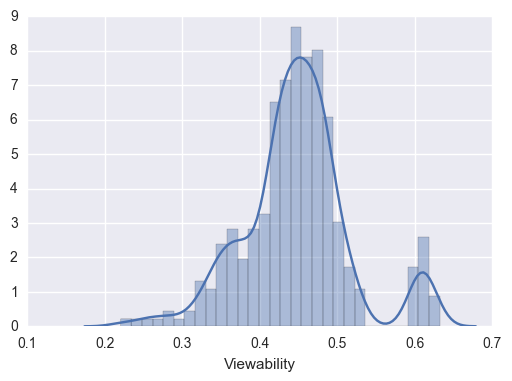

In [29]:
testplot = sns.distplot(ndata.Viewability, bins=30, )

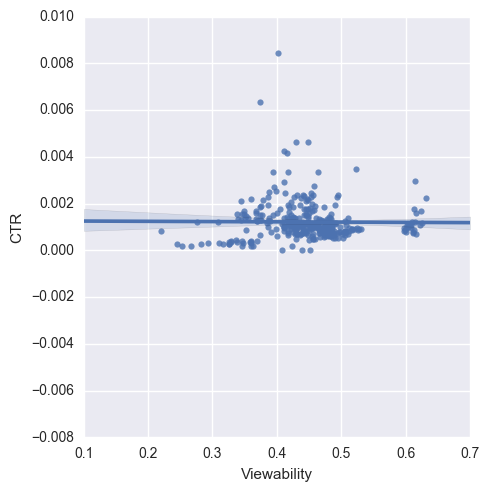

In [34]:
ndata = sns.lmplot(data=ndata, x="Viewability", y="CTR")

In [31]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(ndata.CTR, ndata.Viewability)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     648.5
Date:                Tue, 14 Feb 2017   Prob (F-statistic):           2.43e-80
Time:                        14:51:28   Log-Likelihood:                 1893.7
No. Observations:                 336   AIC:                            -3785.
Df Residuals:                     335   BIC:                            -3782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Viewability     0.0027      0.000     25.465      